In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import random
from tensorflow.keras import regularizers

In [2]:
def load_data(train_size):
    """
    Load the feature and target dataset, and split the data into training, validation and test set
    Args:
        train_size (float): proportion of the dataset to include in the training set
    """
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=train_size)
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5)
    data = {"train": (X_train, y_train), "val": (X_val, y_val), "test": (X_test, y_test)}
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
def create_nn():
    """
    Return a 3 layer neural network
    """
    tf.random.set_seed(1234)
    model = Sequential(
        [
            tf.keras.Input(shape=(400,)), # each image is 20 by 20, flatten out is 400
            Dense(25, activation = 'relu', kernel_regularizer=regularizers.L2(0.005)),
            Dense(15, activation = 'relu', kernel_regularizer=regularizers.L2(0.005)),
            Dense(10, activation = 'linear', kernel_regularizer=regularizers.L2(0.005))
        ], name = "nn_model")
    return model

In [4]:
def select_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    """
    find the best model
    Args:
        X_train (ndarray): feature value of each training example
        y_train (ndarray): target value of each validation example
        X_val (ndarray): feature value of each training example
        y_val (ndarray): target value of each training example
        learning_rate (float): learning rate of gradient descent
        epochs (int): number of steps in gradient descent
    Returns:
        best_model: a tf.keras.Model() with best validation accuray
    """
    best_acc = 0
    best_epoch = 0
    best_lr = 0
    best_model = None

    for epoch in epochs:
        for l in learning_rate:
            model = create_nn()
            model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                          optimizer=tf.keras.optimizers.Adam(learning_rate=l))
            model.fit(X_train, y_train, epochs=epoch)
            train_prediction, train_acc = predict(model, X_train, y_train)
            # print("epochs: {}, learning rate: {}, train_acc: {}".format(epoch, l, train_acc))
            train_prediction, val_acc = predict(model, X_val,y_val)
            # print("epochs: {}, learning rate: {}, val_acc: {}".format(epoch, l, val_acc))

            if val_acc > best_acc:
                best_acc = val_acc
                best_epoch = epoch
                best_lr = l
                best_model = model

    print("best epochs: {}, best learning rate: {}".format(best_epoch, best_lr))

    return best_model

In [5]:
def predict(model, X, y):
    """
    Return the prediction and accuray for the dataset
    Args:
        model (tf.keras,Model()): a fitted model
        X (ndarray): feature value of each example
        y (ndarray): target value of each example
    Returns:
        prediction (ndarray shape (m, 1)): predicted target value of each example
        accuracy (float): percentage of correct predictions
    """
    m, n = X.shape
    prediction = model.predict(X.reshape(-1, 400))
    # if you need a probability output then use prediction = tf.nn.softmax(prediction)
    prediction = np.argmax(prediction, axis = 1)
    prediction = prediction.reshape(m, 1)
    accuracy = np.sum((prediction == y) / m)

    return prediction, accuracy

In [6]:
# The data contains 5000 examples of handwritten digits. Each example is a 20 pixel by 20 pixel grayscale image
# Each 20 by 20 image is unrolled into a 400 dimensional vector.
X_train, y_train, X_val, y_val, X_test, y_test = load_data(0.7)

In [7]:
print("Shape of X_train: " + str(X_train.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of X_val: " + str(X_val.shape))
print("Shape of y_val: " + str(y_val.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_test: " + str(y_test.shape))

Shape of X_train: (3500, 400)
Shape of y_train: (3500, 1)
Shape of X_val: (750, 400)
Shape of y_val: (750, 1)
Shape of X_test: (750, 400)
Shape of y_test: (750, 1)


In [8]:
# learning_rate = [0.001, 0.01, 0.05]
# epochs = [10, 25, 40, 60]
# learning rate 0.001 with 40 epochs give the best validation accuray
learning_rate = [0.001]
epochs = [40]
best_model = select_model(X_train, y_train, X_val, y_val, learning_rate, epochs)

Epoch 1/40
110/110 [==============================] - 1s 2ms/step - loss: 2.1867
Epoch 2/40
110/110 [==============================] - 0s 2ms/step - loss: 1.3977
Epoch 3/40
110/110 [==============================] - 0s 2ms/step - loss: 0.9469
Epoch 4/40
110/110 [==============================] - 0s 2ms/step - loss: 0.8184
Epoch 5/40
110/110 [==============================] - 0s 2ms/step - loss: 0.7606
Epoch 6/40
110/110 [==============================] - 0s 2ms/step - loss: 0.7235
Epoch 7/40
110/110 [==============================] - 0s 2ms/step - loss: 0.7006
Epoch 8/40
110/110 [==============================] - 0s 2ms/step - loss: 0.6828
Epoch 9/40
110/110 [==============================] - 0s 2ms/step - loss: 0.6689
Epoch 10/40
110/110 [==============================] - 0s 2ms/step - loss: 0.6597
Epoch 11/40
110/110 [==============================] - 0s 2ms/step - loss: 0.6470
Epoch 12/40
110/110 [==============================] - 0s 2ms/step - loss: 0.6424
Epoch 13/40
110/110 [====

### Accuray

In [9]:
train_prediction, train_acc = predict(best_model, X_train, y_train)
print("train_acc: {:.4f}".format(train_acc))

train_prediction, val_acc = predict(best_model, X_val, y_val)
print("val_acc: {:.4f}".format(val_acc))

test_prediction, test_acc = predict(best_model, X_test, y_test)
print("test_acc: {:.4f}".format(test_acc))

110/110 [==============================] - 0s 1ms/step
train_acc: 0.9586
24/24 [==============================] - 0s 1ms/step
val_acc: 0.9200
24/24 [==============================] - 0s 1ms/step
test_acc: 0.9293


### Examples

In [10]:
random_idx = random.sample(range(0, len(X_test)), 10) # get random 10 indices from the feature test set
example = y_test[random_idx] # get the target value for the 10 indices
print("Target value:  " + str(example.T))
print("Predict value: " + str(test_prediction[random_idx].T))

Target value:  [[8 4 2 2 9 9 5 0 6 0]]
Predict value: [[8 4 2 2 4 9 5 0 6 0]]


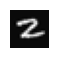

The target value for this example is [2]
The predicted target value for this example is [2]


In [14]:
# display a image of the example
X_reshaped = X_test[random_idx[3]].reshape((20,20)).T
plt.figure(figsize=(0.5, 0.5))
plt.imshow(X_reshaped, cmap='gray')
plt.axis('off')
plt.show()
print("The target value for this example is " + str(y_test[random_idx[3]]))
print("The predicted target value for this example is " + str(test_prediction[random_idx[3]]))

In [16]:
print("There are " + str(np.sum(test_prediction != y_test)) + " errors in the predictions of test set")

There are 53 errors in the predictions of test set


### More examples of wrong predictions

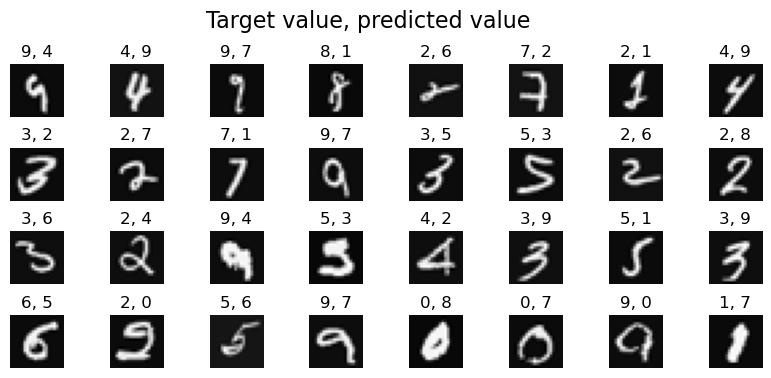

In [18]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_test.shape
idxs = np.where(test_prediction != y_test)[0] # get the indices where the target value is different from the predicted value

# Create subsplots for each of the falsely predicted elements
fig, axes = plt.subplots(4, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.5, 1, 0.92]) #[left, bottom, right, top]

# axes is a 8 by 8 np array
for i, ax in enumerate(axes.flat): 
    # Select the indices of wrong predictions
    i_wrong_pred = idxs[i]
    # Select examples corresponding to the indices of wrong predictions and reshape the image
    X_wrong_pred = X_test[i_wrong_pred].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_wrong_pred, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y_test[i_wrong_pred, 0]}, {test_prediction[i_wrong_pred, 0]}")
    # disable the axis
    ax.set_axis_off() 
fig.suptitle("Target value, predicted value", fontsize=16)
plt.show()